<a href="https://colab.research.google.com/github/UdeshikaP/DL_LabSheet_2/blob/main/ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [5]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize the dataset

Target labels:  [3 7 6 8 2 7 0 0 6 6]


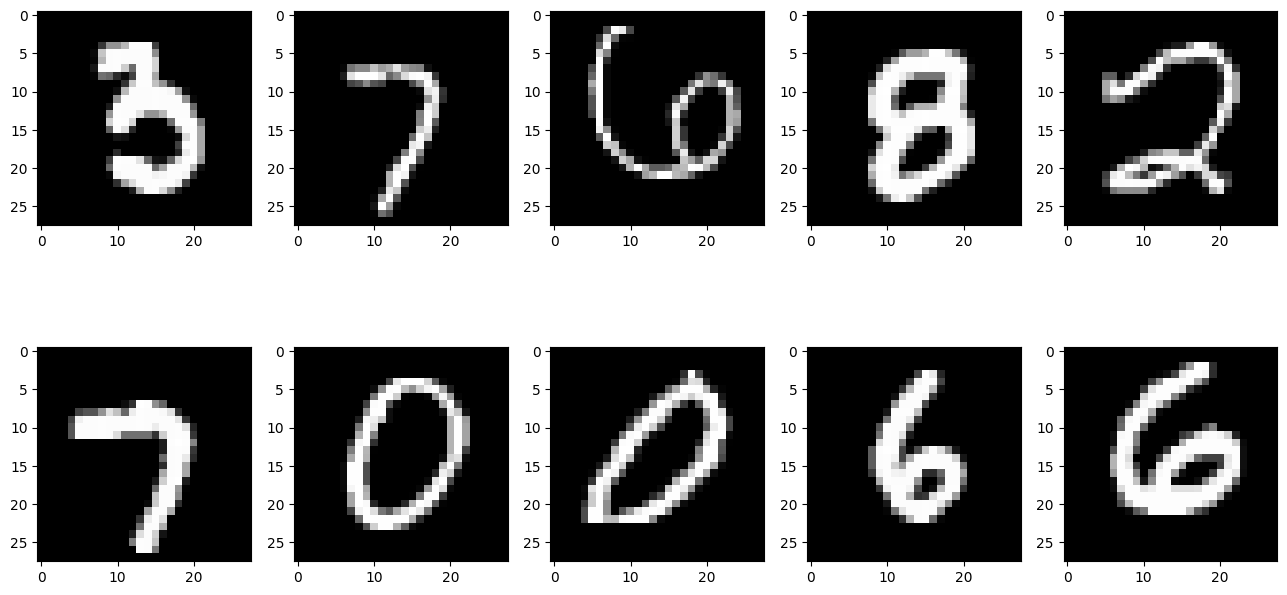

In [6]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [7]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [9]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [11]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8463 - loss: 0.5112
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9611 - loss: 0.1296
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9713 - loss: 0.0935
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9777 - loss: 0.0721
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0577
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9842 - loss: 0.0479
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9862 - loss: 0.0422
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9886 - loss: 0.0368
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0295
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0266


Plot the loss and accuracy graphs

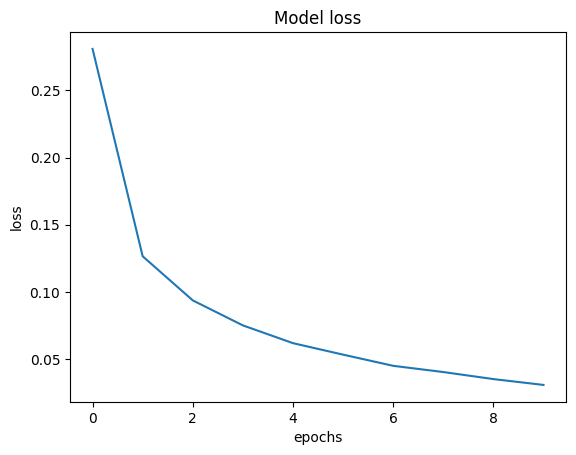

In [12]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

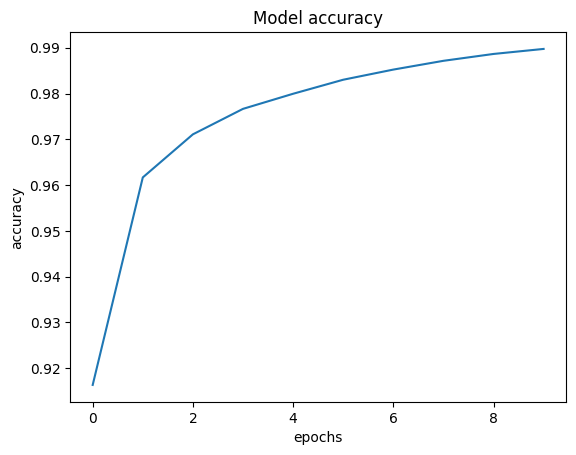

In [13]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [14]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1220
Loss of the Test dataset is: 0.10224932432174683
Accuracy of the test dataset is: 0.9732000231742859


Save the model weights

In [15]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')
#.h5 for full model save
#.weights.h5 for save model weight

**a. Improve the test accuracy of the model by changing the hyperparameters.**

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

# Increase neurons, maybe add dropout later
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_info = model.fit(new_train_data, new_train_target, epochs=20, batch_size=256, validation_split=0.1)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7795 - loss: 0.7802 - val_accuracy: 0.9605 - val_loss: 0.1435
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9572 - loss: 0.1520 - val_accuracy: 0.9638 - val_loss: 0.1236
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9709 - loss: 0.1013 - val_accuracy: 0.9732 - val_loss: 0.0977
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0760 - val_accuracy: 0.9738 - val_loss: 0.0897
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9834 - loss: 0.0549 - val_accuracy: 0.9788 - val_loss: 0.0763
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9885 - loss: 0.0393 - val_accuracy: 0.9783 - val_loss: 0.0820
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9902 - loss: 0.0302 - val_accuracy: 0.9775 - val_loss: 0.0820
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9929 - loss: 0.0242 - val_accuracy

**b. Add L1 and L2 regularization terms to the model and retrain the model.**

In [17]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.001)))  # L1
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))   # L2
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))  # L1 + L2
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_info = model.fit(new_train_data, new_train_target, epochs=20, batch_size=256, validation_split=0.1)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7220 - loss: 4.7247 - val_accuracy: 0.9252 - val_loss: 0.9883
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9091 - loss: 0.9793 - val_accuracy: 0.9395 - val_loss: 0.7927
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9276 - loss: 0.8044 - val_accuracy: 0.9475 - val_loss: 0.6951
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9365 - loss: 0.7215 - val_accuracy: 0.9540 - val_loss: 0.6270
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9439 - loss: 0.6497 - val_accuracy: 0.9595 - val_loss: 0.5840
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9492 - loss: 0.6016 - val_accuracy: 0.9600 - val_loss: 0.5446
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9517 - loss: 0.5633 - val_accuracy: 0.9620 - val_loss: 0.5164
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9514 - loss: 0.5457 - val_accu

**c. Visualize class-wise test dataset performance using a confusion matrix.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


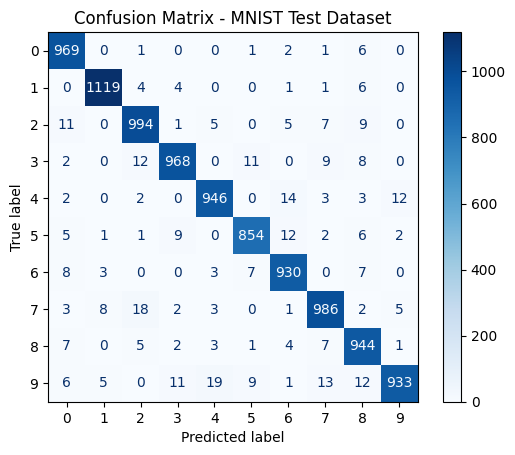

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes on test data
y_pred_probs = model.predict(new_test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(new_test_target, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - MNIST Test Dataset")
plt.show()